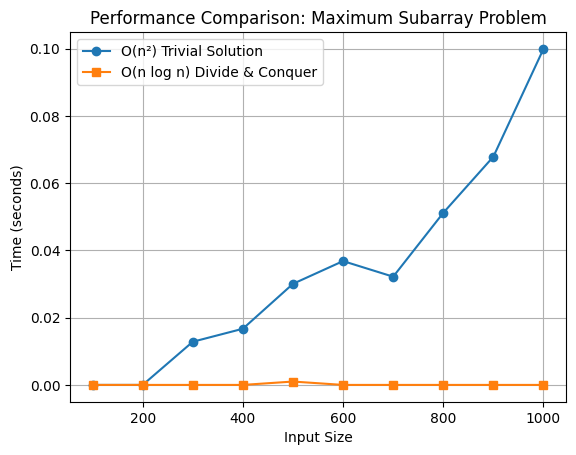

In [3]:
import random
import time
import matplotlib.pyplot as plt

# O(n^2) trivial solution
def max_subarray_trivial(arr):
    n = len(arr)
    max_sum = float('-inf')
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += arr[j]
            max_sum = max(max_sum, current_sum)
    return max_sum

# O(n log n) Divide and Conquer solution
def max_crossing_sum(arr, low, mid, high):
    # Include elements on the left of mid
    left_sum = float('-inf')
    total = 0
    for i in range(mid, low - 1, -1):
        total += arr[i]
        if total > left_sum:
            left_sum = total

    # Include elements on the right of mid
    right_sum = float('-inf')
    total = 0
    for i in range(mid + 1, high + 1):
        total += arr[i]
        if total > right_sum:
            right_sum = total

    return left_sum + right_sum

def max_subarray_divide_and_conquer(arr, low, high):
    if low == high:
        return arr[low]

    mid = (low + high) // 2
    left_sum = max_subarray_divide_and_conquer(arr, low, mid)
    right_sum = max_subarray_divide_and_conquer(arr, mid + 1, high)
    crossing_sum = max_crossing_sum(arr, low, mid, high)

    return max(left_sum, right_sum, crossing_sum)

# Function to measure execution time
def measure_time(arr, algorithm):
    start_time = time.time()
    result = algorithm(arr)
    end_time = time.time()
    return end_time - start_time

# Generate arrays of varying sizes and record time
input_sizes = range(100, 1100, 100)
times_trivial = []
times_divide_and_conquer = []

for size in input_sizes:
    arr = [random.randint(-100, 100) for _ in range(size)]
    
    # Time the trivial O(n^2) solution
    time_trivial = measure_time(arr, max_subarray_trivial)
    times_trivial.append(time_trivial)
    
    # Time the divide and conquer O(n log n) solution
    time_dac = measure_time(arr, lambda a: max_subarray_divide_and_conquer(a, 0, len(a) - 1))
    times_divide_and_conquer.append(time_dac)

# Plot the results
plt.plot(input_sizes, times_trivial, label="O(n²) Trivial Solution", marker='o')
plt.plot(input_sizes, times_divide_and_conquer, label="O(n log n) Divide & Conquer", marker='s')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Maximum Subarray Problem')
plt.legend()
plt.grid(True)
plt.show()
